In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
an_df = pd.read_csv(r"C:\Users\user\Desktop\MLPC\annotations.csv")
an_df.head(2)

,task_id,filename,annotator,text,onset,offset,filename_unsafe
0,161977861,560761.mp3,5945971035380930099053858595454362549806990533...,bird twitters nearby with a high pitch two times,16.552368,17.271435,560761_tufted titmouse calling.mp3
1,161987165,240538.mp3,4916274343929406460752597829190197300566135449...,A cow bell clinging repeatedly,12.265866,15.420303,240538_AMB - Cowbell stable Stereowav.mp3


In [3]:
meta_df = pd.read_csv(r"C:\Users\user\Desktop\MLPC\metadata.csv")
meta_df[["keywords","description","start_time_s","end_time_s"]].head()
meta_df.head(1)

,filename,keywords,freesound_id,sound_link,manufacturer,license,title,description,num_downloads,geotag,start_time_s,end_time_s
0,617030.mp3,"atmosphere, general-noise, suburban, ambiance,...",617030,https://freesound.org/people/klankbeeld/sounds...,klankbeeld,https://creativecommons.org/licenses/by/4.0/,suburb night NL 1041PM 210415_0279.wav,Night in a suburban city. All sounds far. Tra...,65,51.7090740261 5.30657821347,15.6,43.535


In [59]:
an_meta_df = an_df.merge(meta_df,on='filename', how='left')
an_meta_df = an_meta_df[["filename","annotator","text","keywords","title","start_time_s","end_time_s"]]
an_meta_df[an_meta_df["filename"]=="100491.mp3"]

,filename,annotator,text,keywords,title,start_time_s,end_time_s
4298,100491.mp3,9815655844810626804359568722886255701756207496...,A brief burst of pressurized air/gas or steam ...,"go, passing, station, train, union",GO Train passing Union Station.WAV,22.4,41.622
6549,100491.mp3,9815655844810626804359568722886255701756207496...,Whooshing of displaced air as a train passes b...,"go, passing, station, train, union",GO Train passing Union Station.WAV,22.4,41.622
18069,100491.mp3,9815655844810626804359568722886255701756207496...,A continuous and rhythmic bell chime that grad...,"go, passing, station, train, union",GO Train passing Union Station.WAV,22.4,41.622
29244,100491.mp3,9815655844810626804359568722886255701756207496...,Whooshing of displaced air as a train passes b...,"go, passing, station, train, union",GO Train passing Union Station.WAV,22.4,41.622
29394,100491.mp3,9815655844810626804359568722886255701756207496...,A continuous and rhythmic bell chime that grad...,"go, passing, station, train, union",GO Train passing Union Station.WAV,22.4,41.622


**Loading embeddings**

In [6]:
an_em = np.load(r"C:\Users\user\Desktop\MLPC\annotations_text_embeddings.npz")["embeddings"]
meta_keywords_em = np.load(r"C:\Users\user\Desktop\MLPC\metadata_keywords_embeddings.npz")["embeddings"]
meta_title_em = np.load(r"C:\Users\user\Desktop\MLPC\metadata_title_embeddings.npz")["embeddings"]

**filename,annotator,score dictionaries to DataFrames**

In [7]:
meta_keyword_dict = {}
meta_title_dict = {}
for file,v in zip(meta_df["filename"],meta_keywords_em):
    meta_keyword_dict[file]= v

for file,v in zip(meta_df["filename"],meta_title_em):
    meta_title_dict[file]= v

In [8]:
dot_keyword = {"filename": [], "annotator": [], "keyword_dot_score": []}
dot_title = {"filename": [], "annotator": [], "title_dot_score": []}
cosine_keyword = {"filename": [], "annotator": [], "cosine_keyword_score": []}
cosine_title = {"filename": [], "annotator": [], "cosine_title_score": []}

for file, idx, v in zip(an_meta_df["filename"], an_meta_df["annotator"], an_em):
    dot_keyword["filename"].append(file)
    dot_keyword["annotator"].append(idx)
    dot_keyword["keyword_dot_score"].append(np.dot(v, meta_keyword_dict[file]))

    dot_title["filename"].append(file)
    dot_title["annotator"].append(idx)
    dot_title["title_dot_score"].append(np.dot(v, meta_title_dict[file]))

for file, idx, v in zip(an_meta_df["filename"], an_meta_df["annotator"], an_em):
    cos_kw = np.dot(v, meta_keyword_dict[file]) / (np.linalg.norm(v) * np.linalg.norm( meta_keyword_dict[file]))
    cosine_keyword["filename"].append(file)
    cosine_keyword["annotator"].append(idx) 
    cosine_keyword["cosine_keyword_score"].append(cos_kw)

    
    cos_title = np.dot(v, meta_title_dict[file]) / (np.linalg.norm(v)  *  np.linalg.norm(meta_title_dict[file]))
    cosine_title["filename"].append(file)
    cosine_title["annotator"].append(idx)
    cosine_title["cosine_title_score"].append(cos_title)
 

In [9]:
dk_df = pd.DataFrame.from_dict(dot_keyword)
dt_df = pd.DataFrame.from_dict(dot_title)
ck_df = pd.DataFrame.from_dict(cosine_keyword)
ct_df = pd.DataFrame.from_dict(cosine_title) 

In [106]:
dk_df.sort_values(by="keyword_dot_score",ascending=False)

,filename,annotator,keyword_dot_score
6535,18958.mp3,44,1.000000
33853,18958.mp3,44,1.000000
32234,18958.mp3,44,1.000000
1829,18958.mp3,44,1.000000
19892,18958.mp3,44,1.000000
...,...,...,...
21760,725322.mp3,97,-0.311826
27902,711716.mp3,93,-0.319289
16411,347838.mp3,303,-0.320162
27880,347838.mp3,303,-0.320162


**Mapping unique Annotators using unique index**

In [11]:
dk_an_dict = {}
ck_an_dict ={}
unique_annotators = dk_df["annotator"].unique()
for i,v in zip(dk_df["annotator"].unique(),range(330)):
    dk_an_dict[i] = v
for i,v in zip(ck_df["annotator"].unique(),range(330)):
    ck_an_dict[i] = v




dk_df["annotator"]= dk_df["annotator"].map(dk_an_dict)
ck_df["annotator"]=ck_df["annotator"].map(ck_an_dict)

**Manipulation of DataFrames with only files that have been annotated more than once**

In [12]:
c=dk_df.groupby("annotator").filter(lambda x: x['filename'].nunique() > 1)
a=ck_df.groupby("annotator").filter(lambda x:x["filename"].nunique() >1)
comparison = c.pivot_table( index='annotator',columns='filename', values='keyword_dot_score',aggfunc='mean')
comparison_1 = a.pivot_table(index="annotator",columns="filename",values="cosine_keyword_score",aggfunc = "mean")

**Standarded deviation of each annotor across all files for quality check**

In [13]:
comparison['std'] = comparison.std(axis=1)
comparison_1["std"] = comparison_1.std(axis=1)
comparison

filename,100300.mp3,100389.mp3,100489.mp3,100491.mp3,100492.mp3,101134.mp3,101344.mp3,101488.mp3,101508.mp3,101692.mp3,...,98819.mp3,99027.mp3,99080.mp3,99082.mp3,99083.mp3,99085.mp3,9921.mp3,99436.mp3,99770.mp3,std
annotator,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.191487
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229253
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.163800
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.208203
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.185610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169946
324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.244269
325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.223749


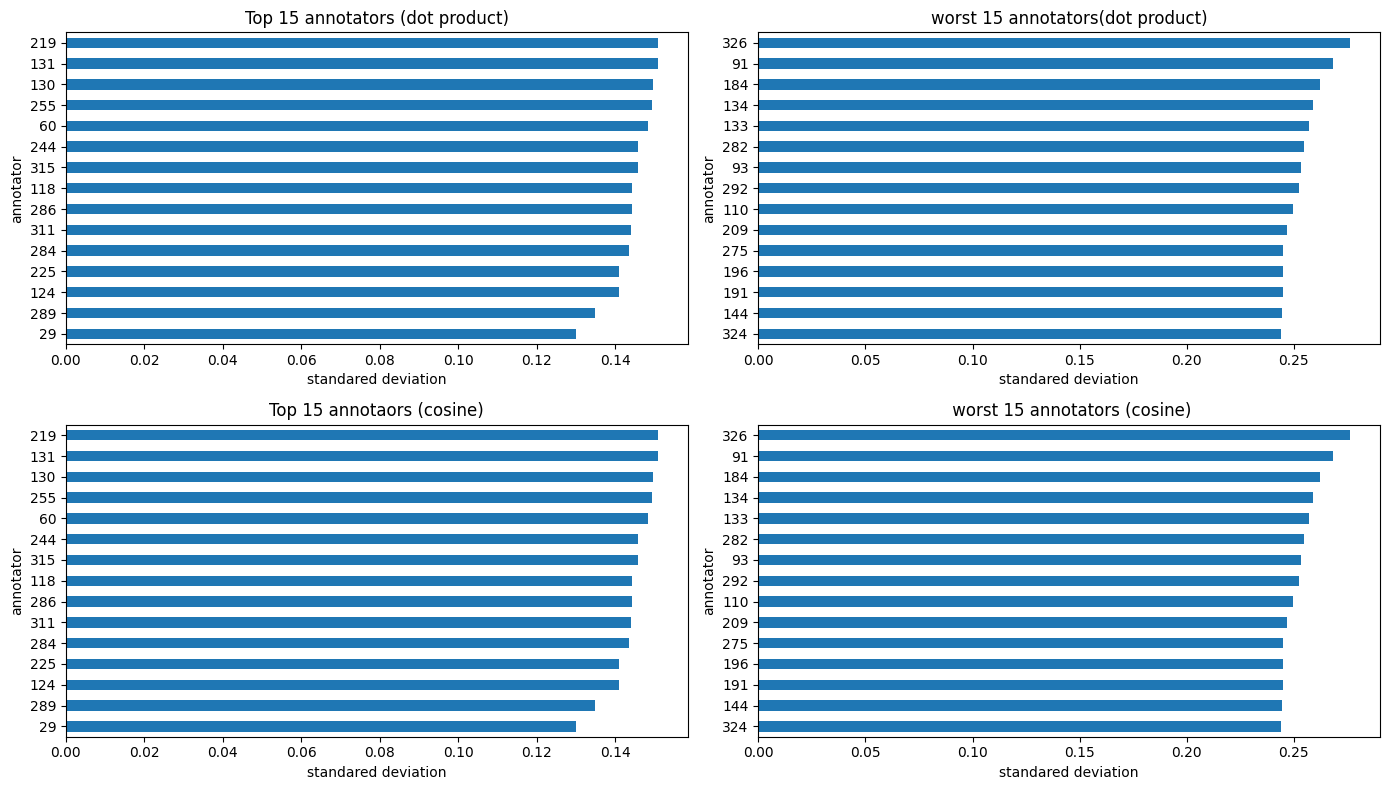

In [14]:
fig,ax=plt.subplots(2,2,figsize=(14,7))
comparison['std'].sort_values(ascending=True).head(15).plot(kind='barh', figsize=(14,8), title='Top 15 annotators (dot product)',ax=ax[0,0])
comparison['std'].sort_values(ascending=True).tail(15).plot(kind='barh', figsize=(14,8), title='worst 15 annotators(dot product)',ax=ax[0,1])

ax[0,0].set_xlabel("standared deviation")
ax[0,1].set_xlabel("standared deviation")

comparison_1["std"].sort_values(ascending=True).head(15).plot(kind='barh', figsize=(14,8), title='Top 15 annotaors (cosine)',ax=ax[1,0])
comparison_1["std"].sort_values(ascending=True).tail(15).plot(kind='barh', figsize=(14,8), title=' worst 15 annotators (cosine)',ax=ax[1,1])

ax[1,0].set_xlabel("standared deviation")
ax[1,1].set_xlabel("standared deviation")

plt.tight_layout()

In [122]:
top_15_df =comparison.reset_index()[["annotator",'std']].sort_values("std",ascending=True).head(15).reset_index()
worst_15_df= comparison.reset_index()[["annotator",'std']].sort_values("std",ascending=True).tail(15).reset_index()
best_an,worst_an = [],[]

for i in top_15_df["annotator"]:
    key = next((k for k, v in dk_an_dict.items() if v == i), None)
    best_an.append(key)

for i in worst_15_df["annotator"]:
    key = next((k for k, v in dk_an_dict.items() if v == i), None)
    worst_an.append(key)

In [123]:
print(f"Best annotators:\n {best_an} \n")
print(f"worst annotators:\n {worst_an}")

Best annotators:
 ['74504496207763599570205492036951755720164005756933064662572796160970109920561', '92927509887337217051403751053914297111581088864496515863321759158236303157141', '83668893003008678305118405095817913716497674204911163421851306056878320318153', '81295356170598761765361041969219405881279640249234956417389057225106419980461', '88808593240738214148544673739568555813355180563626535356043018855863770763992', '6995720596902748843208672390432937662271218262265423675134947986577677287362', '112564115413485089702850121337141539667485578084293487010818286715173652551704', '11235025750893334987515811224901126444532282124799654216415594163534250880759', '35236511503299891105901045254518427269727299804928485234664223280944356850526', '21731403352566939458290932445848497509228486043659747918552528793263295950144', '89268961656196770420015726013867871904209727634434054021147009031359678483682', '5066749238262937777735330933221191407821243639193437054829877133545692559010', '100085476

In [15]:
#df.groupby("filename")["type of score"].std() could be used to check what was the hardest file to annotated

**How detailed are the annotations**

In [16]:
an_meta_df.head(1)

,filename,annotator,text,keywords,title,start_time_s,end_time_s
0,560761.mp3,5945971035380930099053858595454362549806990533...,bird twitters nearby with a high pitch two times,"spring, birds, titmouse, bird-song, communicat...",tufted titmouse calling,0.0,17.921


In [17]:
char_dot = {"filename": [], "annotator": [], "keyword_dot_score": [],"text":[],"len_text":[]}
char_cosine = {"filename": [], "annotator": [], "keyword_cosine_score": [],"text":[],"len_text":[]}


for file, idx, v,t in zip(an_meta_df["filename"], an_meta_df["annotator"], an_em,an_meta_df["text"]):
    char_dot["filename"].append(file)
    char_dot["annotator"].append(idx)
    char_dot["keyword_dot_score"].append(np.dot(v, meta_keyword_dict[file]))
    char_dot["text"].append(t)
    char_dot["len_text"].append(len(t))

for file, idx, v,t in zip(an_meta_df["filename"], an_meta_df["annotator"], an_em,an_meta_df["text"]):
    cos_kw = np.dot(v, meta_keyword_dict[file]) / (np.linalg.norm(v) * np.linalg.norm( meta_keyword_dict[file]))
    char_cosine["filename"].append(file)
    char_cosine["annotator"].append(idx) 
    char_cosine["keyword_cosine_score"].append(cos_kw)
    char_cosine["text"].append(t)
    char_cosine["len_text"].append(len(t))

In [18]:
char_dot_df = pd.DataFrame.from_dict(char_dot)
char_cosine_df = pd.DataFrame.from_dict(char_cosine)
char_dot_df

,filename,annotator,keyword_dot_score,text,len_text
0,560761.mp3,5945971035380930099053858595454362549806990533...,0.227497,bird twitters nearby with a high pitch two times,48
1,240538.mp3,4916274343929406460752597829190197300566135449...,0.509850,A cow bell clinging repeatedly,30
2,660337.mp3,8960534646813062318784592632173589349806817458...,-0.048722,A child speaks with a high-pitched voice,41
3,725686.mp3,4540509031938851510799116530500792274849113758...,0.694167,A high pitch meowing coming from a cat,38
4,97606.mp3,1085174475307080254018414698413953957857995126...,0.459145,An extremely loud brushing sound on a construc...,56
...,...,...,...,...,...
35821,753549.mp3,3726708446743795395146689300474862582980552105...,0.343861,The wind blows continuously through a lively s...,51
35822,581129.mp3,3059733177805983774512466816373938435425883139...,0.280752,car honking loudly three times in near distanc...,70
35823,338992.mp3,9292750988733721705140375105391429711158108886...,0.072487,Spring Sound comes.,19
35824,405574.mp3,2923154225281563601415862970877602525202198991...,0.502281,"Water lapping on an uneven surface, outside, a...",58


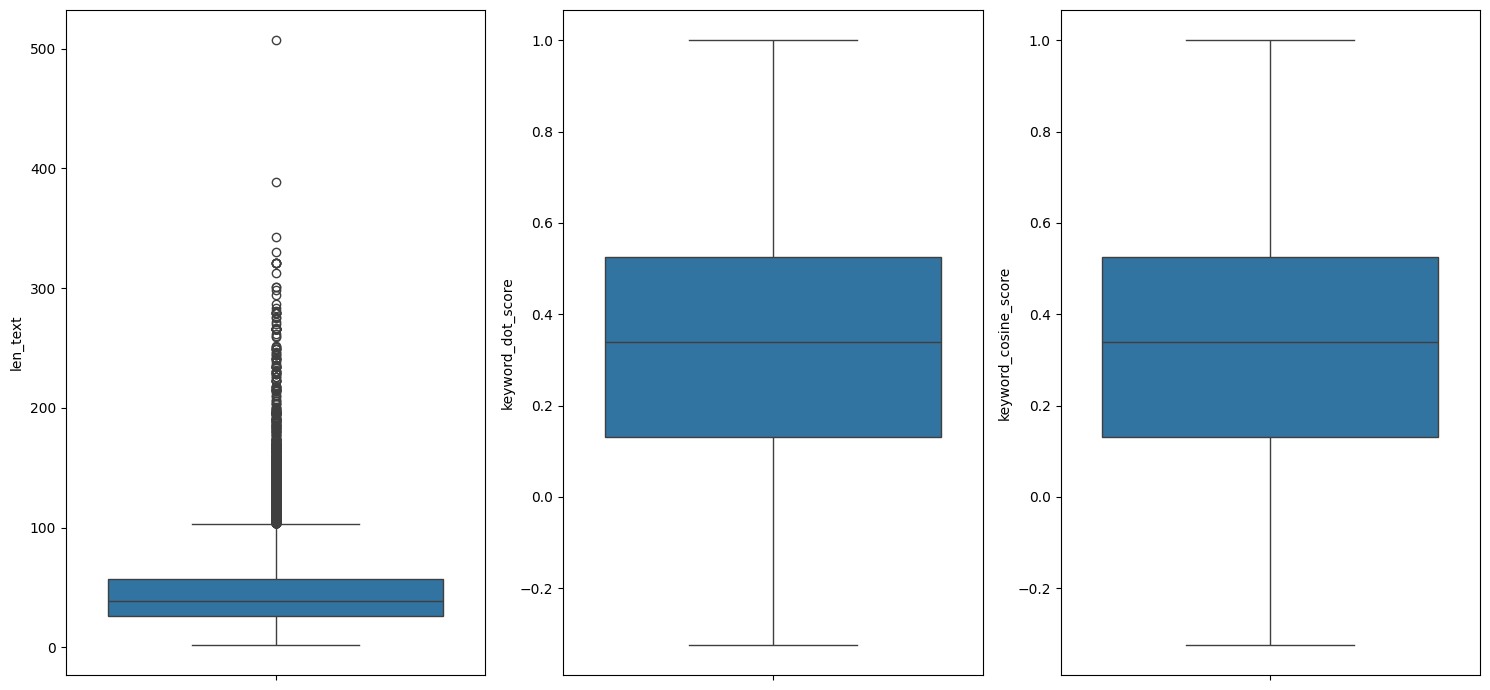

In [19]:
fig,ax = plt.subplots(1,3,figsize=(15,7))
sns.boxplot(char_dot_df["len_text"],ax=ax[0])
sns.boxplot(char_dot_df["keyword_dot_score"], ax=ax[1])
sns.boxplot(char_cosine_df["keyword_cosine_score"],ax=ax[2])
plt.tight_layout()

<Axes: xlabel='len_text', ylabel='keyword_dot_score'>

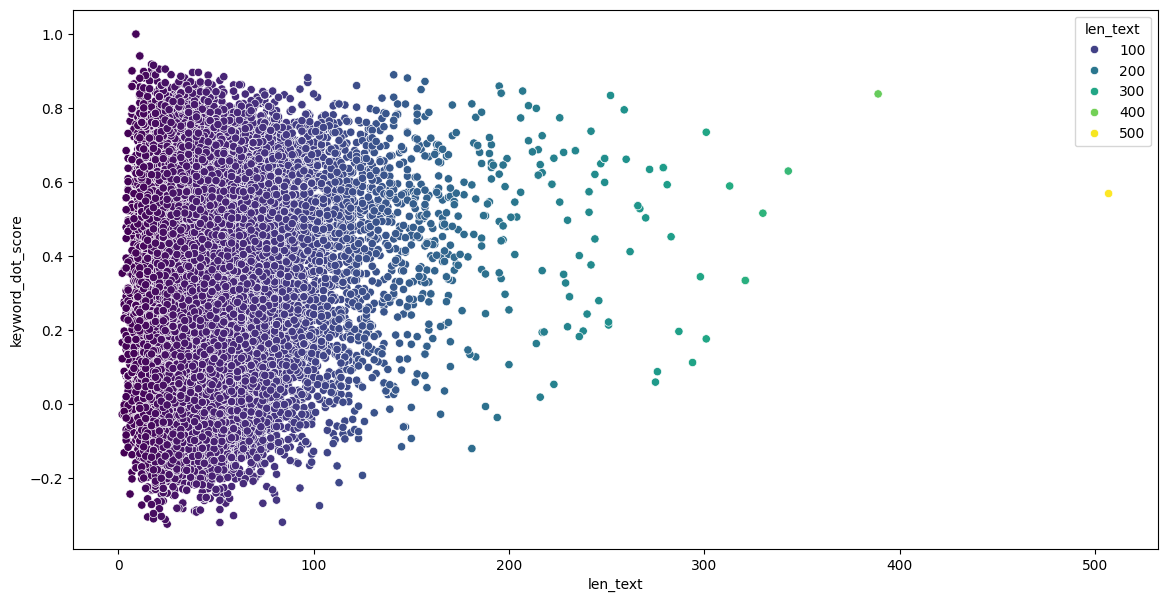

In [20]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=char_dot_df, x="len_text", y="keyword_dot_score", hue="len_text", palette="viridis")

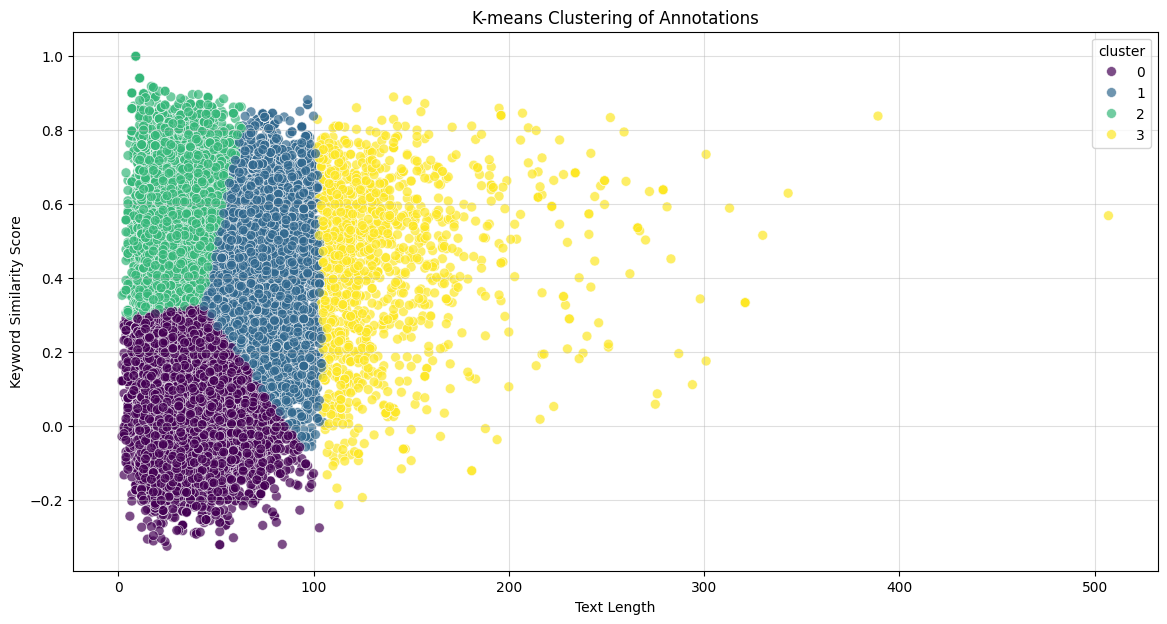

           len_text                  keyword_dot_score                    
               mean  min  max  count              mean       min       max
cluster                                                                   
0         35.472348    2  103  14538          0.091709 -0.324334  0.323454
1         69.069224   44  105   7743          0.425771 -0.055880  0.882421
2         30.427875    2   63  12111          0.541756  0.299438  1.000000
3        137.378661  102  507   1434          0.446217 -0.212452  0.889956


In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
features = char_dot_df[['len_text', 'keyword_dot_score']].copy()

# Standardize the features (important for k-means)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Choose the number of clusters (you can adjust this)
n_clusters = 4

# Apply k-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
char_dot_df['cluster'] = kmeans.fit_predict(features_scaled)

# Plot the results
plt.figure(figsize=(14, 7))

#subset = char_dot_df[char_dot_df['cluster'] == cluster]
sns.scatterplot(data=char_dot_df,x='len_text', y='keyword_dot_score', hue="cluster", palette='viridis',
alpha=0.7, 
s=50,  # Point size
    edgecolor='w',  # White edge on points
    linewidth=0.5)

plt.xlabel('Text Length')
plt.ylabel('Keyword Similarity Score')
plt.title('K-means Clustering of Annotations')
plt.grid(True,alpha=0.4)
plt.show()

# Get statistics for each cluster
cluster_stats = char_dot_df.groupby('cluster').agg({
    'len_text': ['mean', 'min', 'max', 'count'],
    'keyword_dot_score': ['mean', 'min', 'max']
})
print(cluster_stats)

**Number of annotations per file** 

In [30]:
an_count_df = an_meta_df.groupby("filename").count()["text"]
an_count_df

filename
100300.mp3    1
100389.mp3    4
100489.mp3    4
100491.mp3    5
100492.mp3    1
             ..
99083.mp3     3
99085.mp3     1
9921.mp3      2
99436.mp3     1
99770.mp3     1
Name: text, Length: 9026, dtype: int64

**Number of sound sources per file**

In [60]:
#assuming ppl used the same annoataion for the same sound source.
sound_count_df = an_meta_df.groupby("filename")["text"].nunique()
sound_count_df

filename
100300.mp3    1
100389.mp3    2
100489.mp3    4
100491.mp3    5
100492.mp3    1
             ..
99083.mp3     3
99085.mp3     1
9921.mp3      2
99436.mp3     1
99770.mp3     1
Name: text, Length: 9026, dtype: int64